# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

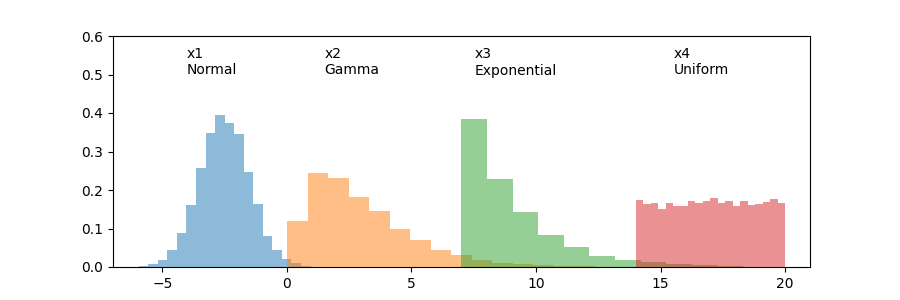

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

(array([0.17503109, 0.16402914, 0.16536271, 0.15136022, 0.16702967,
        0.15836146, 0.15936164, 0.17169716, 0.1656961 , 0.17036359,
        0.17969859, 0.16602949, 0.17236395, 0.15969503, 0.17036359,
        0.1610286 , 0.16369574, 0.16936342, 0.17603127, 0.16736306]),
 array([14.0002417 , 14.30018841, 14.60013512, 14.90008184, 15.20002855,
        15.49997526, 15.79992197, 16.09986869, 16.3998154 , 16.69976211,
        16.99970883, 17.29965554, 17.59960225, 17.89954896, 18.19949568,
        18.49944239, 18.7993891 , 19.09933581, 19.39928253, 19.69922924,
        19.99917595]),
 <BarContainer object of 20 artists>)

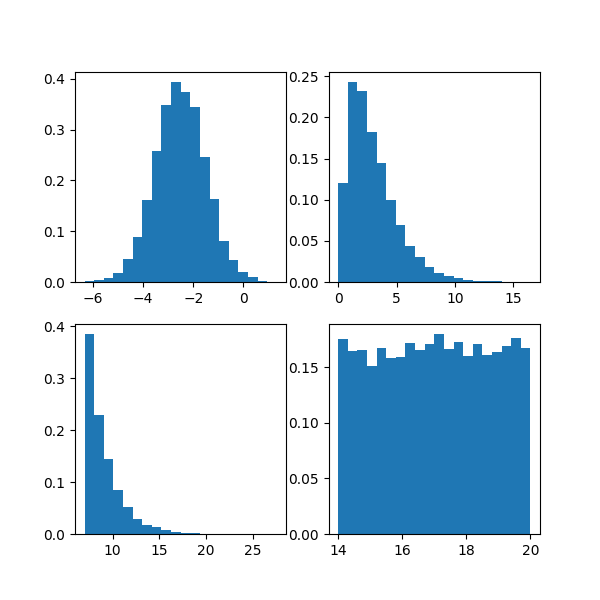

In [2]:
plt.figure(figsize=(6,6))

plt.subplot(221)
plt.hist(x1, density=True, bins=20)

plt.subplot(222)
plt.hist(x2, density=True, bins=20)

plt.subplot(223)
plt.hist(x3, density=True, bins=20)

plt.subplot(224)
plt.hist(x4, density=True, bins=20)

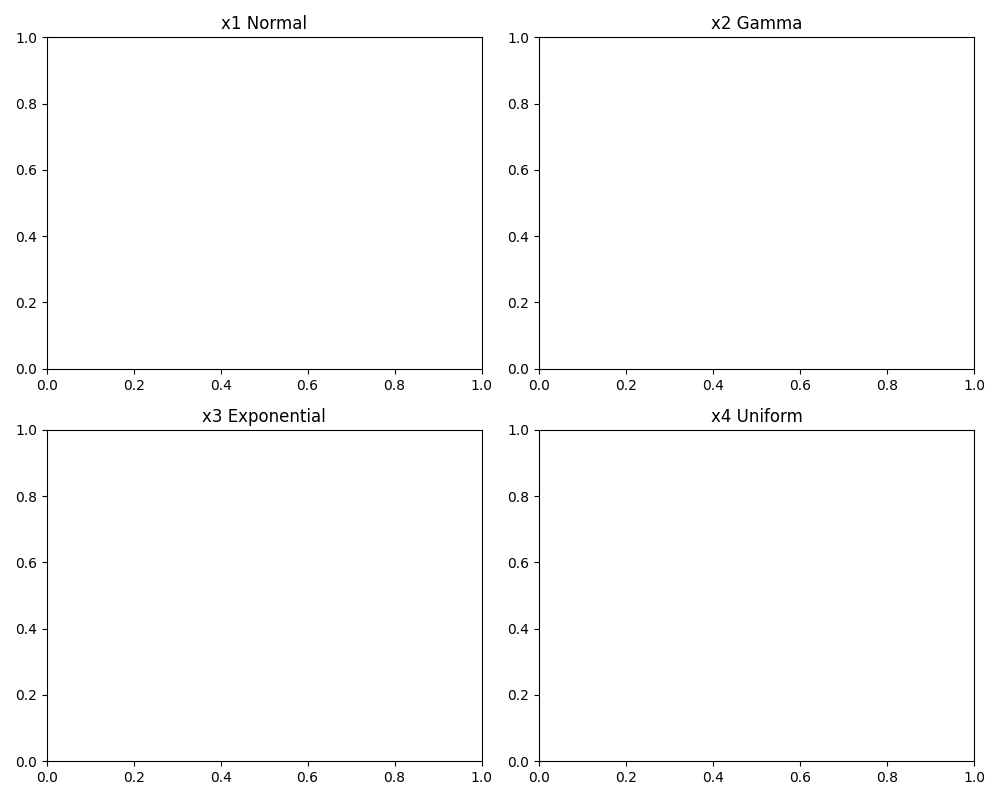

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

fig, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize=(10, 8))

a1.set_title('x1 Normal')
a2.set_title('x2 Gamma')
a3.set_title('x3 Exponential')
a4.set_title('x4 Uniform')

def update(current):
    if current >= 100:
        instance.event_source.stop()
    
    a1.cla()
    a2.cla()
    a3.cla()
    a4.cla()
    
    a1.set_title('x1 Normal')
    a2.set_title('x2 Gamma')
    a3.set_title('x3 Exponential')
    a4.set_title('x4 Uniform')
    
    a1.hist(x1[:current*10], density=True, bins=20, alpha=0.7)
    a2.hist(x2[:current*10], density=True, bins=20, alpha=0.7)
    a3.hist(x3[:current*10], density=True, bins=20, alpha=0.7)
    a4.hist(x4[:current*10], density=True, bins=20, alpha=0.7)
    
    # Optional: Set consistent axis ranges
    # a1.set_xlim([0, 20])
    # a2.set_xlim([0, 20])
    # a3.set_xlim([0, 20])
    # a4.set_xlim([0, 20])
    
    fig.suptitle(f'Sample size: {current*10}', fontsize=14)

# Create and start animation
instance = animation.FuncAnimation(fig, update, interval=100, frames=100)
plt.tight_layout()
plt.show()